## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import friedman3Dataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split
import numpy as np

## Import Dataset 


In [3]:
n_features = 4
n_samples= 100
n_target = 1
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  57.819701   982.569372  0.195409   4.346374  1.398280
1  94.652767  1457.462792  0.520841  10.744802  1.566515
2  24.210355  1386.676442  0.212946   9.880266  1.405219
3  90.868752   397.698580  0.195008   7.570821  0.693227
4  39.481063   304.119289  0.846216   2.933777  1.204014


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)

print(X.shape)
print(Y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 4)
(100,)
(80, 4)
(80,)
(20, 4)
(20,)


## Stats Model 



No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.486
Model:                            OLS   Adj. R-squared (uncentered):              0.459
Method:                 Least Squares   F-statistic:                              17.94
Date:                Wed, 22 Jun 2022   Prob (F-statistic):                    2.08e-10
Time:                        16:17:38   Log-Likelihood:                         -86.343
No. Observations:                  80   AIC:                                      180.7
Df Residuals:                      76   BIC:                                      190.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

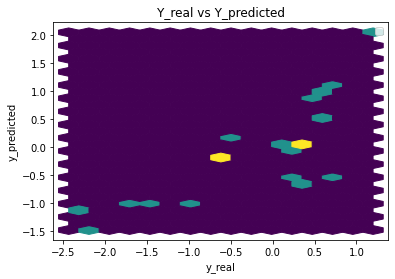

Performance Metrics


Mean Squared Error: 0.3932387258239515
Mean Absolute Error: 0.5258945026728957
Manhattan distance: 10.517890053457915
Euclidean distance: 2.804420531318195


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)

Learning rate set to 0.027471
0:	learn: 0.9802116	total: 57.7ms	remaining: 57.6s
1:	learn: 0.9728559	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9657869	total: 59.7ms	remaining: 19.8s
3:	learn: 0.9555112	total: 60.6ms	remaining: 15.1s
4:	learn: 0.9457056	total: 61.2ms	remaining: 12.2s
5:	learn: 0.9371456	total: 62.1ms	remaining: 10.3s
6:	learn: 0.9266265	total: 62.7ms	remaining: 8.9s
7:	learn: 0.9172109	total: 63.7ms	remaining: 7.9s
8:	learn: 0.9096226	total: 64.9ms	remaining: 7.15s
9:	learn: 0.8991677	total: 65.5ms	remaining: 6.48s
10:	learn: 0.8919683	total: 66ms	remaining: 5.93s
11:	learn: 0.8832664	total: 66.5ms	remaining: 5.48s
12:	learn: 0.8769836	total: 67ms	remaining: 5.09s
13:	learn: 0.8664251	total: 67.6ms	remaining: 4.76s
14:	learn: 0.8583884	total: 68.2ms	remaining: 4.47s
15:	learn: 0.8487297	total: 69.1ms	remaining: 4.25s
16:	learn: 0.8396206	total: 70ms	remaining: 4.05s
17:	learn: 0.8311249	total: 70.6ms	remaining: 3.85s
18:	learn: 0.8263701	total: 71.1ms	remaining: 3.67s


96:	learn: 0.4459621	total: 114ms	remaining: 1.06s
97:	learn: 0.4425496	total: 115ms	remaining: 1.06s
98:	learn: 0.4395624	total: 115ms	remaining: 1.05s
99:	learn: 0.4368365	total: 116ms	remaining: 1.04s
100:	learn: 0.4333589	total: 117ms	remaining: 1.04s
101:	learn: 0.4307569	total: 117ms	remaining: 1.03s
102:	learn: 0.4278937	total: 117ms	remaining: 1.02s
103:	learn: 0.4244429	total: 118ms	remaining: 1.02s
104:	learn: 0.4217312	total: 118ms	remaining: 1.01s
105:	learn: 0.4194340	total: 119ms	remaining: 1s
106:	learn: 0.4163388	total: 119ms	remaining: 995ms
107:	learn: 0.4139342	total: 120ms	remaining: 989ms
108:	learn: 0.4106366	total: 120ms	remaining: 982ms
109:	learn: 0.4075463	total: 121ms	remaining: 978ms
110:	learn: 0.4055708	total: 121ms	remaining: 972ms
111:	learn: 0.4027684	total: 122ms	remaining: 965ms
112:	learn: 0.4004957	total: 122ms	remaining: 960ms
113:	learn: 0.3978761	total: 123ms	remaining: 953ms
114:	learn: 0.3949523	total: 123ms	remaining: 947ms
115:	learn: 0.39310

201:	learn: 0.2582663	total: 162ms	remaining: 642ms
202:	learn: 0.2571213	total: 163ms	remaining: 640ms
203:	learn: 0.2558102	total: 164ms	remaining: 640ms
204:	learn: 0.2550482	total: 164ms	remaining: 638ms
205:	learn: 0.2539367	total: 165ms	remaining: 636ms
206:	learn: 0.2521764	total: 165ms	remaining: 634ms
207:	learn: 0.2514970	total: 166ms	remaining: 632ms
208:	learn: 0.2504003	total: 166ms	remaining: 629ms
209:	learn: 0.2495055	total: 167ms	remaining: 627ms
210:	learn: 0.2487200	total: 167ms	remaining: 625ms
211:	learn: 0.2481929	total: 168ms	remaining: 623ms
212:	learn: 0.2471524	total: 168ms	remaining: 621ms
213:	learn: 0.2463723	total: 169ms	remaining: 619ms
214:	learn: 0.2453308	total: 169ms	remaining: 618ms
215:	learn: 0.2447319	total: 170ms	remaining: 615ms
216:	learn: 0.2434501	total: 170ms	remaining: 613ms
217:	learn: 0.2419719	total: 170ms	remaining: 611ms
218:	learn: 0.2407146	total: 171ms	remaining: 609ms
219:	learn: 0.2400249	total: 171ms	remaining: 607ms
220:	learn: 

391:	learn: 0.1281875	total: 264ms	remaining: 410ms
392:	learn: 0.1279648	total: 266ms	remaining: 410ms
393:	learn: 0.1272946	total: 266ms	remaining: 409ms
394:	learn: 0.1271475	total: 266ms	remaining: 408ms
395:	learn: 0.1268307	total: 267ms	remaining: 407ms
396:	learn: 0.1262953	total: 267ms	remaining: 406ms
397:	learn: 0.1260650	total: 268ms	remaining: 405ms
398:	learn: 0.1258362	total: 268ms	remaining: 404ms
399:	learn: 0.1256953	total: 269ms	remaining: 403ms
400:	learn: 0.1253242	total: 269ms	remaining: 402ms
401:	learn: 0.1246899	total: 270ms	remaining: 401ms
402:	learn: 0.1244668	total: 270ms	remaining: 400ms
403:	learn: 0.1237954	total: 270ms	remaining: 399ms
404:	learn: 0.1234534	total: 271ms	remaining: 398ms
405:	learn: 0.1232329	total: 271ms	remaining: 397ms
406:	learn: 0.1227315	total: 272ms	remaining: 396ms
407:	learn: 0.1225168	total: 272ms	remaining: 395ms
408:	learn: 0.1223053	total: 273ms	remaining: 394ms
409:	learn: 0.1216479	total: 273ms	remaining: 393ms
410:	learn: 

484:	learn: 0.0974313	total: 313ms	remaining: 333ms
485:	learn: 0.0970418	total: 314ms	remaining: 332ms
486:	learn: 0.0965077	total: 314ms	remaining: 331ms
487:	learn: 0.0961298	total: 314ms	remaining: 330ms
488:	learn: 0.0956242	total: 315ms	remaining: 329ms
489:	learn: 0.0955446	total: 315ms	remaining: 328ms
490:	learn: 0.0951633	total: 318ms	remaining: 330ms
491:	learn: 0.0950855	total: 319ms	remaining: 329ms
492:	learn: 0.0945019	total: 319ms	remaining: 328ms
493:	learn: 0.0939295	total: 320ms	remaining: 327ms
494:	learn: 0.0933682	total: 320ms	remaining: 327ms
495:	learn: 0.0929599	total: 321ms	remaining: 326ms
496:	learn: 0.0924130	total: 321ms	remaining: 325ms
497:	learn: 0.0918544	total: 322ms	remaining: 324ms
498:	learn: 0.0914584	total: 322ms	remaining: 323ms
499:	learn: 0.0912858	total: 323ms	remaining: 323ms
500:	learn: 0.0912103	total: 323ms	remaining: 322ms
501:	learn: 0.0908221	total: 323ms	remaining: 321ms
502:	learn: 0.0907486	total: 324ms	remaining: 320ms
503:	learn: 

718:	learn: 0.0530512	total: 419ms	remaining: 164ms
719:	learn: 0.0528605	total: 419ms	remaining: 163ms
720:	learn: 0.0526088	total: 420ms	remaining: 162ms
721:	learn: 0.0525562	total: 421ms	remaining: 162ms
722:	learn: 0.0523109	total: 421ms	remaining: 161ms
723:	learn: 0.0521515	total: 421ms	remaining: 161ms
724:	learn: 0.0521240	total: 422ms	remaining: 160ms
725:	learn: 0.0518870	total: 422ms	remaining: 159ms
726:	learn: 0.0517454	total: 423ms	remaining: 159ms
727:	learn: 0.0517183	total: 423ms	remaining: 158ms
728:	learn: 0.0514888	total: 423ms	remaining: 157ms
729:	learn: 0.0513611	total: 424ms	remaining: 157ms
730:	learn: 0.0512243	total: 424ms	remaining: 156ms
731:	learn: 0.0511014	total: 425ms	remaining: 155ms
732:	learn: 0.0508801	total: 425ms	remaining: 155ms
733:	learn: 0.0508535	total: 425ms	remaining: 154ms
734:	learn: 0.0507352	total: 426ms	remaining: 154ms
735:	learn: 0.0505196	total: 426ms	remaining: 153ms
736:	learn: 0.0504057	total: 427ms	remaining: 152ms
737:	learn: 

833:	learn: 0.0408008	total: 476ms	remaining: 94.8ms
834:	learn: 0.0406557	total: 477ms	remaining: 94.2ms
835:	learn: 0.0406145	total: 477ms	remaining: 93.6ms
836:	learn: 0.0404082	total: 478ms	remaining: 93ms
837:	learn: 0.0403125	total: 478ms	remaining: 92.4ms
838:	learn: 0.0402874	total: 479ms	remaining: 91.9ms
839:	learn: 0.0402627	total: 479ms	remaining: 91.3ms
840:	learn: 0.0402227	total: 480ms	remaining: 90.7ms
841:	learn: 0.0400964	total: 480ms	remaining: 90.1ms
842:	learn: 0.0400722	total: 481ms	remaining: 89.5ms
843:	learn: 0.0399250	total: 481ms	remaining: 88.9ms
844:	learn: 0.0398319	total: 482ms	remaining: 88.3ms
845:	learn: 0.0397094	total: 482ms	remaining: 87.8ms
846:	learn: 0.0396858	total: 483ms	remaining: 87.2ms
847:	learn: 0.0396625	total: 483ms	remaining: 86.6ms
848:	learn: 0.0395801	total: 483ms	remaining: 86ms
849:	learn: 0.0394909	total: 484ms	remaining: 85.4ms
850:	learn: 0.0394682	total: 484ms	remaining: 84.8ms
851:	learn: 0.0392733	total: 485ms	remaining: 84.3

# TabNet regressor

In [7]:
n_epochs = 1000
batch_size = 32

(80,)
Device used : cpu


epoch 0  | loss: 1.14618 | train_mse: 3.16805 | train_mae: 1.32561 |  0:00:00s
epoch 1  | loss: 0.54558 | train_mse: 4.18703 | train_mae: 1.41582 |  0:00:00s
epoch 2  | loss: 0.37745 | train_mse: 4.03423 | train_mae: 1.25437 |  0:00:00s


epoch 3  | loss: 0.49063 | train_mse: 3.46614 | train_mae: 1.10461 |  0:00:01s
epoch 4  | loss: 0.39845 | train_mse: 2.22594 | train_mae: 0.94759 |  0:00:01s
epoch 5  | loss: 0.4736  | train_mse: 1.71463 | train_mae: 0.88369 |  0:00:01s


epoch 6  | loss: 0.39244 | train_mse: 1.75083 | train_mae: 0.93621 |  0:00:01s
epoch 7  | loss: 0.53512 | train_mse: 1.4141  | train_mae: 0.87013 |  0:00:01s


epoch 8  | loss: 0.59021 | train_mse: 1.27285 | train_mae: 0.80186 |  0:00:01s
epoch 9  | loss: 0.47138 | train_mse: 0.99752 | train_mae: 0.738   |  0:00:01s
epoch 10 | loss: 0.5148  | train_mse: 0.71428 | train_mae: 0.63056 |  0:00:01s


epoch 11 | loss: 0.38039 | train_mse: 0.63281 | train_mae: 0.602   |  0:00:01s
epoch 12 | loss: 0.30986 | train_mse: 0.44472 | train_mae: 0.49659 |  0:00:01s
epoch 13 | loss: 0.32442 | train_mse: 0.4094  | train_mae: 0.4726  |  0:00:02s


epoch 14 | loss: 0.31654 | train_mse: 0.45766 | train_mae: 0.48311 |  0:00:02s
epoch 15 | loss: 0.35993 | train_mse: 0.44567 | train_mae: 0.51043 |  0:00:02s
epoch 16 | loss: 0.31058 | train_mse: 0.50391 | train_mae: 0.53426 |  0:00:02s


epoch 17 | loss: 0.28116 | train_mse: 0.52193 | train_mae: 0.50649 |  0:00:02s
epoch 18 | loss: 0.24141 | train_mse: 0.53247 | train_mae: 0.48425 |  0:00:02s


epoch 19 | loss: 0.27115 | train_mse: 0.48307 | train_mae: 0.45905 |  0:00:02s
epoch 20 | loss: 0.17895 | train_mse: 0.48969 | train_mae: 0.47391 |  0:00:02s
epoch 21 | loss: 0.15239 | train_mse: 0.39653 | train_mae: 0.42483 |  0:00:02s


epoch 22 | loss: 0.15494 | train_mse: 0.34789 | train_mae: 0.4063  |  0:00:02s
epoch 23 | loss: 0.29747 | train_mse: 0.3368  | train_mae: 0.40206 |  0:00:02s
epoch 24 | loss: 0.25337 | train_mse: 0.36392 | train_mae: 0.41668 |  0:00:03s


epoch 25 | loss: 0.36351 | train_mse: 0.32246 | train_mae: 0.40933 |  0:00:03s
epoch 26 | loss: 0.26797 | train_mse: 0.27311 | train_mae: 0.40356 |  0:00:03s
epoch 27 | loss: 0.23188 | train_mse: 0.23248 | train_mae: 0.39257 |  0:00:03s
epoch 28 | loss: 0.21833 | train_mse: 0.18689 | train_mae: 0.34199 |  0:00:03s


epoch 29 | loss: 0.30485 | train_mse: 0.1975  | train_mae: 0.32919 |  0:00:03s
epoch 30 | loss: 0.15572 | train_mse: 0.20561 | train_mae: 0.33516 |  0:00:03s
epoch 31 | loss: 0.23746 | train_mse: 0.20027 | train_mae: 0.33812 |  0:00:03s


epoch 32 | loss: 0.17287 | train_mse: 0.17664 | train_mae: 0.31617 |  0:00:03s
epoch 33 | loss: 0.20225 | train_mse: 0.17712 | train_mae: 0.30931 |  0:00:03s
epoch 34 | loss: 0.18429 | train_mse: 0.16027 | train_mae: 0.30069 |  0:00:03s


epoch 35 | loss: 0.22205 | train_mse: 0.1438  | train_mae: 0.29336 |  0:00:03s
epoch 36 | loss: 0.16266 | train_mse: 0.16457 | train_mae: 0.31342 |  0:00:03s
epoch 37 | loss: 0.17448 | train_mse: 0.21359 | train_mae: 0.34488 |  0:00:03s
epoch 38 | loss: 0.1502  | train_mse: 0.158   | train_mae: 0.2892  |  0:00:03s


epoch 39 | loss: 0.20415 | train_mse: 0.12928 | train_mae: 0.2829  |  0:00:04s
epoch 40 | loss: 0.17595 | train_mse: 0.11965 | train_mae: 0.27197 |  0:00:04s
epoch 41 | loss: 0.15348 | train_mse: 0.12307 | train_mae: 0.27072 |  0:00:04s


epoch 42 | loss: 0.15157 | train_mse: 0.10808 | train_mae: 0.25565 |  0:00:04s
epoch 43 | loss: 0.34196 | train_mse: 0.11872 | train_mae: 0.25965 |  0:00:04s
epoch 44 | loss: 0.10899 | train_mse: 0.09327 | train_mae: 0.24294 |  0:00:04s


epoch 45 | loss: 0.14901 | train_mse: 0.10058 | train_mae: 0.24639 |  0:00:04s
epoch 46 | loss: 0.14853 | train_mse: 0.09593 | train_mae: 0.23989 |  0:00:04s
epoch 47 | loss: 0.20752 | train_mse: 0.13161 | train_mae: 0.27018 |  0:00:04s
epoch 48 | loss: 0.39089 | train_mse: 0.26105 | train_mae: 0.31907 |  0:00:04s


epoch 49 | loss: 0.171   | train_mse: 0.20473 | train_mae: 0.28939 |  0:00:04s
epoch 50 | loss: 0.31103 | train_mse: 0.11852 | train_mae: 0.26105 |  0:00:04s
epoch 51 | loss: 0.2814  | train_mse: 0.12295 | train_mae: 0.26517 |  0:00:04s
epoch 52 | loss: 0.13582 | train_mse: 0.14478 | train_mae: 0.2736  |  0:00:04s


epoch 53 | loss: 0.14257 | train_mse: 0.13343 | train_mae: 0.26703 |  0:00:05s
epoch 54 | loss: 0.18845 | train_mse: 0.11336 | train_mae: 0.25312 |  0:00:05s
epoch 55 | loss: 0.1997  | train_mse: 0.14748 | train_mae: 0.29096 |  0:00:05s
epoch 56 | loss: 0.15835 | train_mse: 0.1504  | train_mae: 0.29719 |  0:00:05s


epoch 57 | loss: 0.23732 | train_mse: 0.1229  | train_mae: 0.27596 |  0:00:05s
epoch 58 | loss: 0.20306 | train_mse: 0.09418 | train_mae: 0.24405 |  0:00:05s
epoch 59 | loss: 0.22165 | train_mse: 0.0878  | train_mae: 0.23173 |  0:00:05s


epoch 60 | loss: 0.15549 | train_mse: 0.09248 | train_mae: 0.22614 |  0:00:05s
epoch 61 | loss: 0.13574 | train_mse: 0.09105 | train_mae: 0.22974 |  0:00:05s
epoch 62 | loss: 0.29365 | train_mse: 0.08357 | train_mae: 0.22181 |  0:00:05s


epoch 63 | loss: 0.22024 | train_mse: 0.09066 | train_mae: 0.22925 |  0:00:05s
epoch 64 | loss: 0.18388 | train_mse: 0.08582 | train_mae: 0.22473 |  0:00:05s
epoch 65 | loss: 0.11305 | train_mse: 0.08193 | train_mae: 0.21866 |  0:00:05s
epoch 66 | loss: 0.1112  | train_mse: 0.08769 | train_mae: 0.21564 |  0:00:05s


epoch 67 | loss: 0.21466 | train_mse: 0.09283 | train_mae: 0.22614 |  0:00:05s
epoch 68 | loss: 0.2636  | train_mse: 0.09554 | train_mae: 0.23385 |  0:00:06s
epoch 69 | loss: 0.23365 | train_mse: 0.09991 | train_mae: 0.23702 |  0:00:06s
epoch 70 | loss: 0.26824 | train_mse: 0.10247 | train_mae: 0.23854 |  0:00:06s


epoch 71 | loss: 0.12452 | train_mse: 0.07793 | train_mae: 0.21549 |  0:00:06s
epoch 72 | loss: 0.16543 | train_mse: 0.09975 | train_mae: 0.24769 |  0:00:06s
epoch 73 | loss: 0.28871 | train_mse: 0.10578 | train_mae: 0.24924 |  0:00:06s


epoch 74 | loss: 0.12625 | train_mse: 0.11527 | train_mae: 0.26037 |  0:00:06s
epoch 75 | loss: 0.20326 | train_mse: 0.111   | train_mae: 0.26019 |  0:00:06s
epoch 76 | loss: 0.17306 | train_mse: 0.10281 | train_mae: 0.24961 |  0:00:06s
epoch 77 | loss: 0.13867 | train_mse: 0.0976  | train_mae: 0.24717 |  0:00:06s


epoch 78 | loss: 0.20468 | train_mse: 0.08872 | train_mae: 0.23652 |  0:00:06s
epoch 79 | loss: 0.13737 | train_mse: 0.08835 | train_mae: 0.23442 |  0:00:06s
epoch 80 | loss: 0.18795 | train_mse: 0.15056 | train_mae: 0.27193 |  0:00:06s
epoch 81 | loss: 0.19303 | train_mse: 0.17251 | train_mae: 0.28892 |  0:00:06s


epoch 82 | loss: 0.22098 | train_mse: 0.15452 | train_mae: 0.26754 |  0:00:06s
epoch 83 | loss: 0.15632 | train_mse: 0.11592 | train_mae: 0.25208 |  0:00:07s
epoch 84 | loss: 0.17155 | train_mse: 0.10262 | train_mae: 0.24643 |  0:00:07s
epoch 85 | loss: 0.1345  | train_mse: 0.10786 | train_mae: 0.24836 |  0:00:07s


epoch 86 | loss: 0.16098 | train_mse: 0.1044  | train_mae: 0.24571 |  0:00:07s
epoch 87 | loss: 0.19651 | train_mse: 0.09798 | train_mae: 0.24401 |  0:00:07s
epoch 88 | loss: 0.11681 | train_mse: 0.10347 | train_mae: 0.25206 |  0:00:07s


epoch 89 | loss: 0.17613 | train_mse: 0.12333 | train_mae: 0.26455 |  0:00:07s
epoch 90 | loss: 0.13441 | train_mse: 0.10842 | train_mae: 0.24357 |  0:00:07s
epoch 91 | loss: 0.27931 | train_mse: 0.08854 | train_mae: 0.23576 |  0:00:07s
epoch 92 | loss: 0.30127 | train_mse: 0.09344 | train_mae: 0.23112 |  0:00:07s


epoch 93 | loss: 0.2124  | train_mse: 0.11939 | train_mae: 0.26382 |  0:00:07s
epoch 94 | loss: 0.19341 | train_mse: 0.14573 | train_mae: 0.28418 |  0:00:07s
epoch 95 | loss: 0.17088 | train_mse: 0.14965 | train_mae: 0.2849  |  0:00:07s
epoch 96 | loss: 0.25296 | train_mse: 0.15164 | train_mae: 0.29056 |  0:00:07s


epoch 97 | loss: 0.31055 | train_mse: 0.11642 | train_mae: 0.26256 |  0:00:07s
epoch 98 | loss: 0.20695 | train_mse: 0.12395 | train_mae: 0.26257 |  0:00:08s
epoch 99 | loss: 0.23881 | train_mse: 0.177   | train_mae: 0.30539 |  0:00:08s
epoch 100| loss: 0.26716 | train_mse: 0.15045 | train_mae: 0.29354 |  0:00:08s


epoch 101| loss: 0.1584  | train_mse: 0.09965 | train_mae: 0.24407 |  0:00:08s
epoch 102| loss: 0.20748 | train_mse: 0.11223 | train_mae: 0.25366 |  0:00:08s
epoch 103| loss: 0.20923 | train_mse: 0.09556 | train_mae: 0.24302 |  0:00:08s


epoch 104| loss: 0.33774 | train_mse: 0.11459 | train_mae: 0.25292 |  0:00:08s
epoch 105| loss: 0.11454 | train_mse: 0.09529 | train_mae: 0.24341 |  0:00:08s
epoch 106| loss: 0.27963 | train_mse: 0.11096 | train_mae: 0.25743 |  0:00:08s
epoch 107| loss: 0.14441 | train_mse: 0.16007 | train_mae: 0.30713 |  0:00:08s


epoch 108| loss: 0.14722 | train_mse: 0.23041 | train_mae: 0.34619 |  0:00:08s
epoch 109| loss: 0.14086 | train_mse: 0.17328 | train_mae: 0.31125 |  0:00:08s
epoch 110| loss: 0.12909 | train_mse: 0.1127  | train_mae: 0.26134 |  0:00:08s
epoch 111| loss: 0.16693 | train_mse: 0.09815 | train_mae: 0.24685 |  0:00:08s


epoch 112| loss: 0.13916 | train_mse: 0.09148 | train_mae: 0.23864 |  0:00:09s
epoch 113| loss: 0.18565 | train_mse: 0.0824  | train_mae: 0.22749 |  0:00:09s
epoch 114| loss: 0.15567 | train_mse: 0.08527 | train_mae: 0.23541 |  0:00:09s
epoch 115| loss: 0.17032 | train_mse: 0.0884  | train_mae: 0.23491 |  0:00:09s


epoch 116| loss: 0.17274 | train_mse: 0.102   | train_mae: 0.24569 |  0:00:09s
epoch 117| loss: 0.242   | train_mse: 0.12641 | train_mae: 0.25884 |  0:00:09s
epoch 118| loss: 0.2101  | train_mse: 0.12037 | train_mae: 0.2589  |  0:00:09s


epoch 119| loss: 0.1853  | train_mse: 0.09404 | train_mae: 0.23168 |  0:00:09s
epoch 120| loss: 0.13957 | train_mse: 0.08287 | train_mae: 0.21906 |  0:00:09s
epoch 121| loss: 0.18908 | train_mse: 0.08891 | train_mae: 0.22718 |  0:00:09s

Early stopping occurred at epoch 121 with best_epoch = 71 and best_train_mae = 0.21549
Best weights from best epoch are automatically used!
BEST VALID SCORE FOR dataset : 0.21548948427521303
FINAL TEST SCORE FOR dataset: 0.3828194200960241
{'loss': [1.1461805343627929, 0.5455758512020111, 0.37745481133461, 0.4906312346458435, 0.39844632148742676, 0.47359801530838014, 0.39243589639663695, 0.5351203799247741, 0.5902139544487, 0.47137898206710815, 0.5147952675819397, 0.3803895562887192, 0.30986045598983764, 0.3244202136993408, 0.3165410101413727, 0.3599270522594452, 0.31057941913604736, 0.2811561346054077, 0.2414131611585617, 0.2711456954479218, 0.17895113825798034, 0.15239063501358033, 0.15494040846824647, 0.29747341871261596, 0.25336681604385375, 0.3635

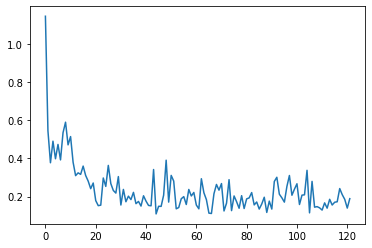

In [8]:
lr = 0.02

print(y_train.shape)
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mae_tab= baselineModels.tabnetreg(X_train,y_train,X_test,y_test,batch_size,n_features,n_target,n_epochs, lr)
sb.glue("TabNet MAE",mae_tab)